In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:

# importing data
file_path = '/content/sample_data/day.csv'
data = pd.read_csv(file_path)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Data Mapping**

In [ ]:
# Season
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Year
data['yr'] = data['yr'].map({0: '2018', 1: '2019'})

# Weathersit
data['weathersit'] = data['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
})

# Weekday
data['weekday'] = data['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

# Holiday
data['holiday'] = data['holiday'].map({0: 'No', 1: 'Yes'})

# Working day
data['workingday'] = data['workingday'].map({0: 'No', 1: 'Yes'})


# Display the transformed data for verification
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,No,Saturday,No,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,No,Sunday,No,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# Datatype

data['dteday'] = pd.to_datetime(data['dteday'], format='mixed')
categorical_columns = ['season', 'yr', 'weekday', 'weathersit', 'holiday', 'workingday', 'mnth']
data[categorical_columns] = data[categorical_columns].astype('category')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    category      
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    category      
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    category      
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(7), datetime64

In [ ]:
# Checking for null values
data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# No null values and all the column datatypes are set. Lets drop unwanted columns

data = data.drop(columns=['casual', 'registered'])
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,2018,1,No,Saturday,No,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-02-01,spring,2018,1,No,Sunday,No,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-03-01,spring,2018,1,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-04-01,spring,2018,1,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-05-01,spring,2018,1,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [ ]:
# UDF

def univariate_analysis(data):

    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

def bivariate_analysis(data, target):
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        if col != target:
            plt.figure(figsize=(8, 4))
            sns.scatterplot(x=data[col], y=data[target])
            plt.title(f"{col} vs {target}")
            plt.xlabel(col)
            plt.ylabel(target)
            plt.show()

def bivariate_categorical_analysis(data, target):
    categorical_columns = data.select_dtypes(include=['category']).columns
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[col], y=data[target])
        plt.title(f"{target} by {col}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.xticks(rotation=45)
        plt.show()

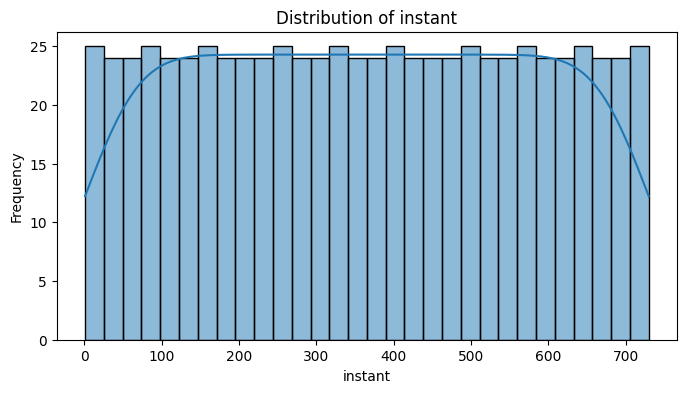

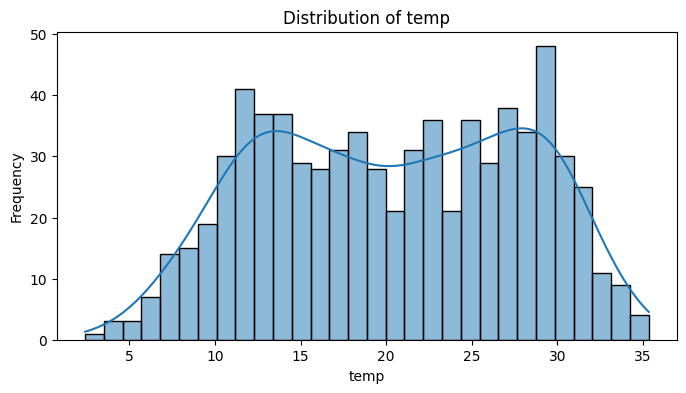

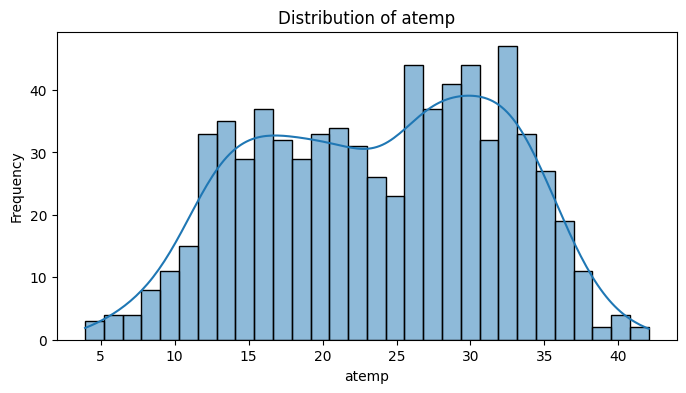

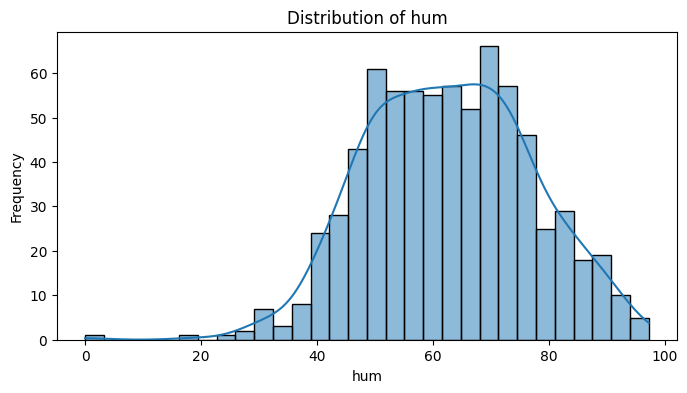

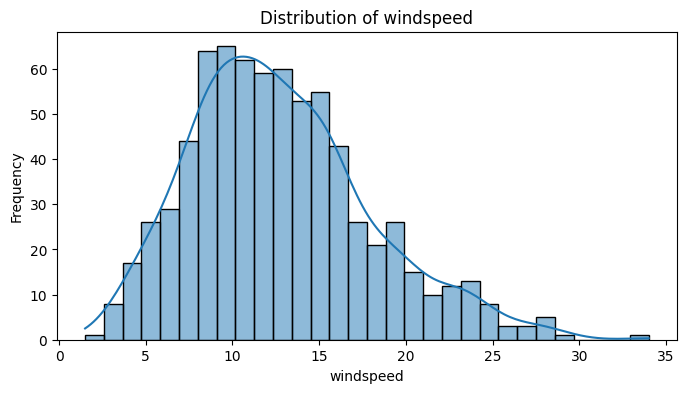

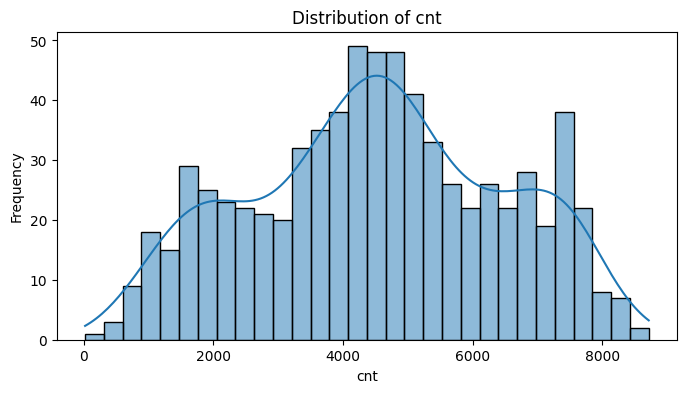

In [ ]:

univariate_analysis(data)

In [ ]:
# Observations

# temp and atemp are approximately normally distributed with most values centered around their mean
# Windspeed  showing that most days experience low wind speeds
# cnt normally distributed (maybe little right skewed)

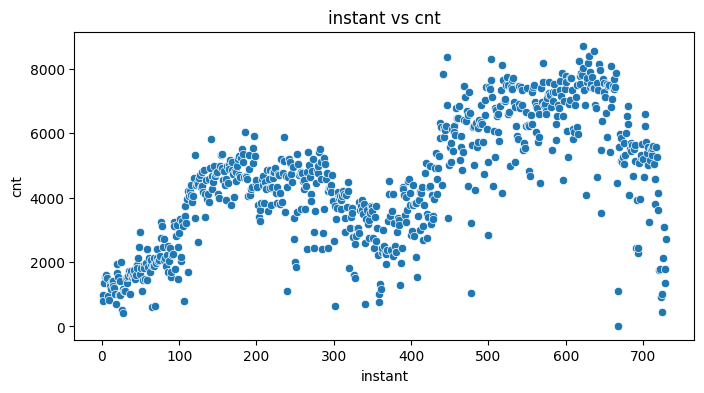

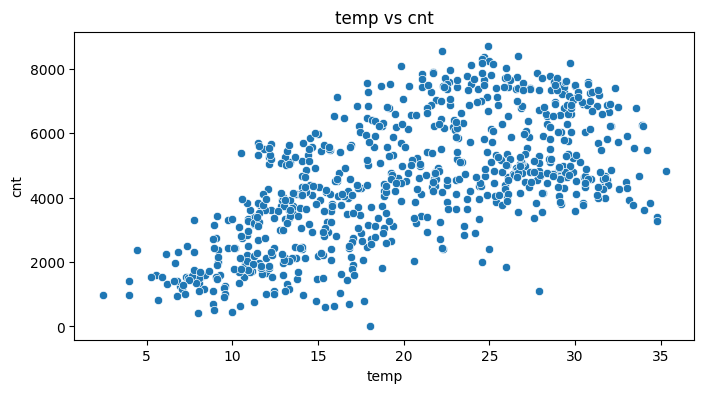

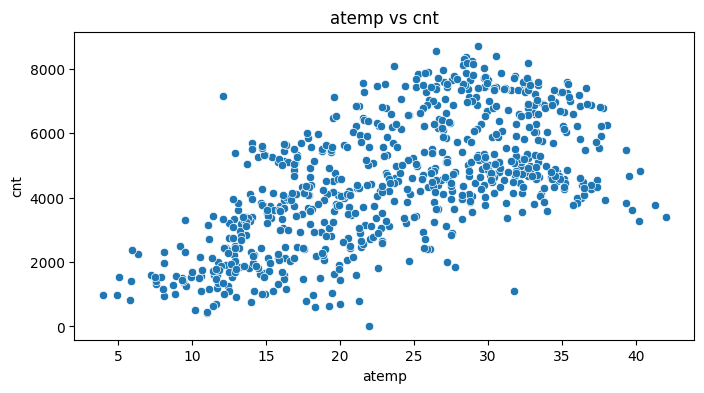

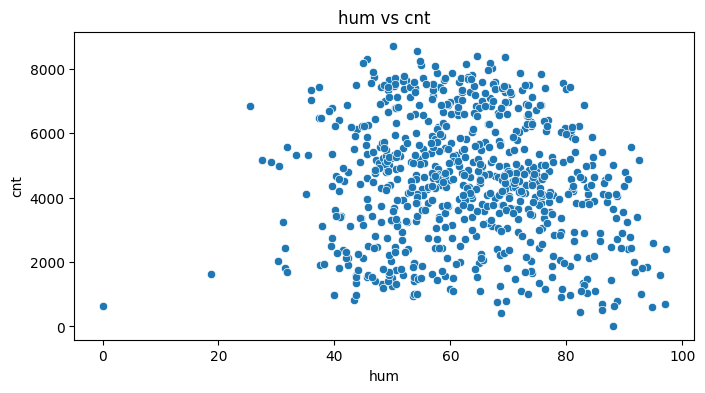

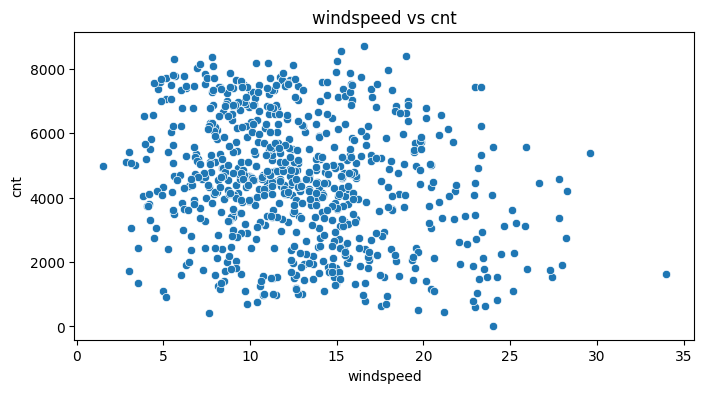

In [ ]:
# Bivariate analysis

bivariate_analysis(data, target='cnt')

In [44]:
### Observations

# temp and cnt -  there seems to be a positive relationship like higher temperatures correlate with higher bike demand.
# atemp and cnt -  positive relationship same as temp
# hum and windspeed there is not much pattern, week correlation maybe

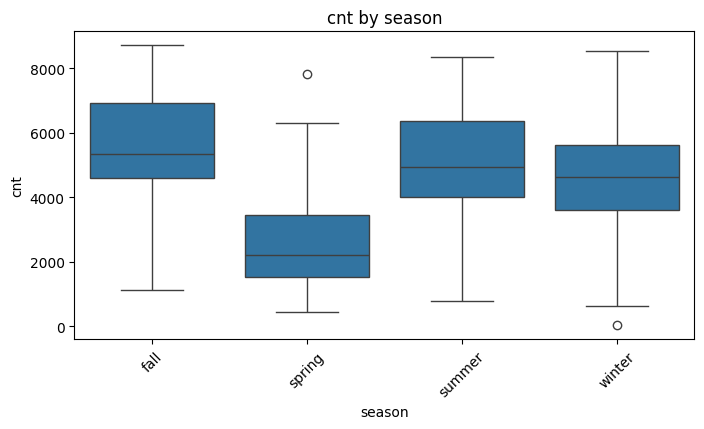

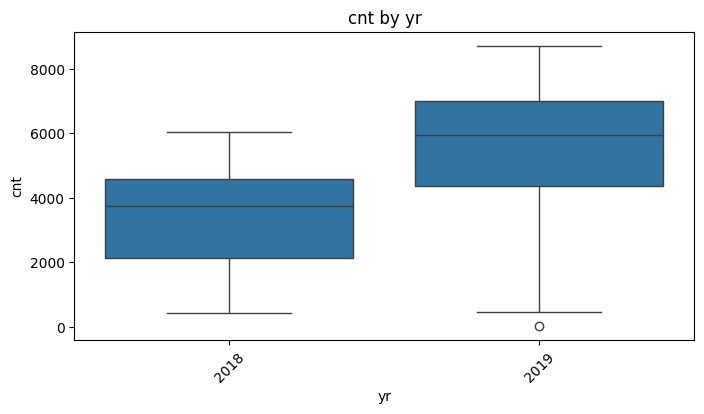

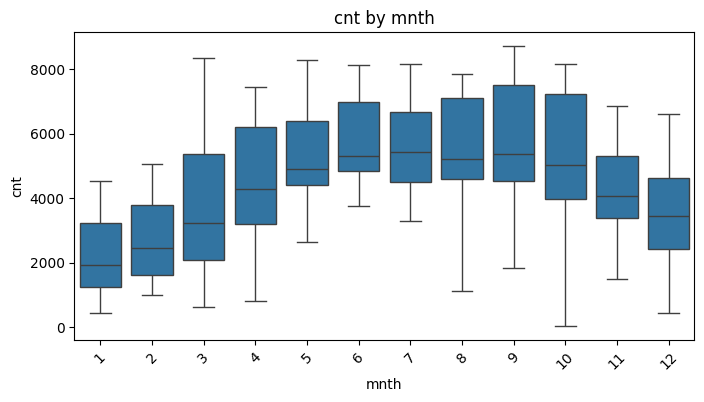

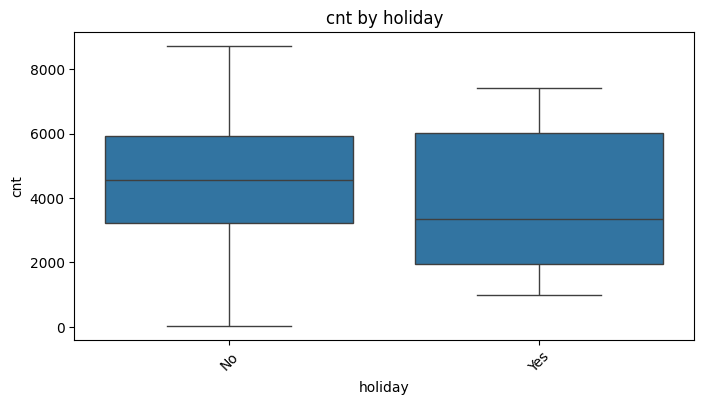

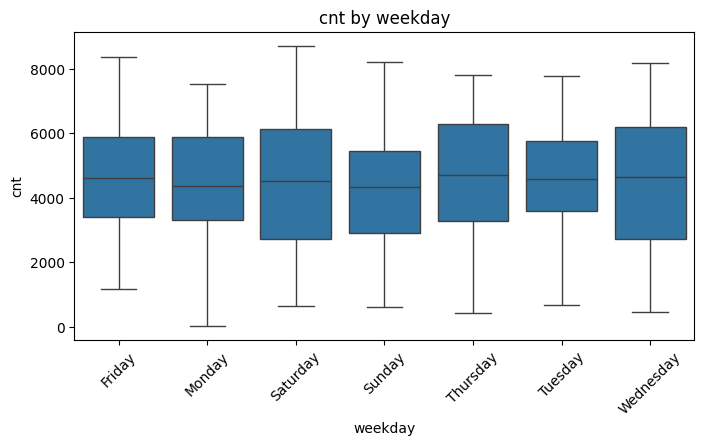

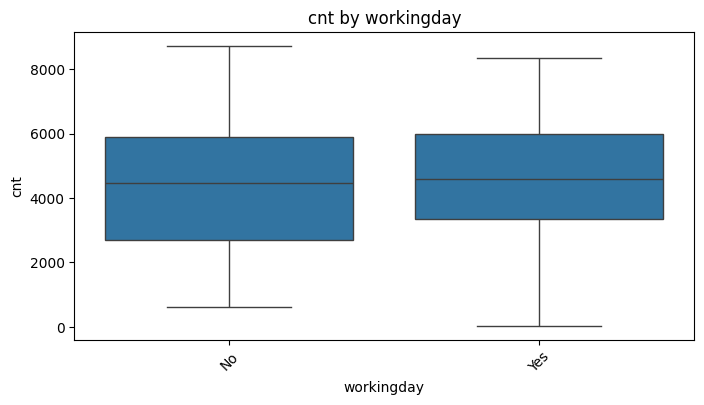

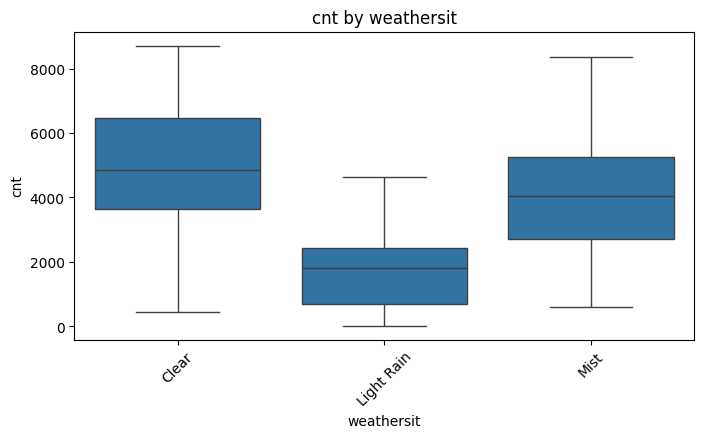

In [ ]:
bivariate_categorical_analysis(data, target='cnt')

In [45]:
### Observations

# season -  Higher bike demand is observed in summer and fall seasons,  Lower demand is seen in winter.
# yt - demand is higher in 2019 compared to 2018, looks like demand is growing overtime (we can check that with line chart next...)
# month - demand is high between 4 to 10 (season demand)
# holiday - lower demand in holiday by looking at mean.
# weekday - looks normal with slight variations
# working day - demand is almost same
# weathersit - demand is high in clear weather compared to rain and mist (it make sense)

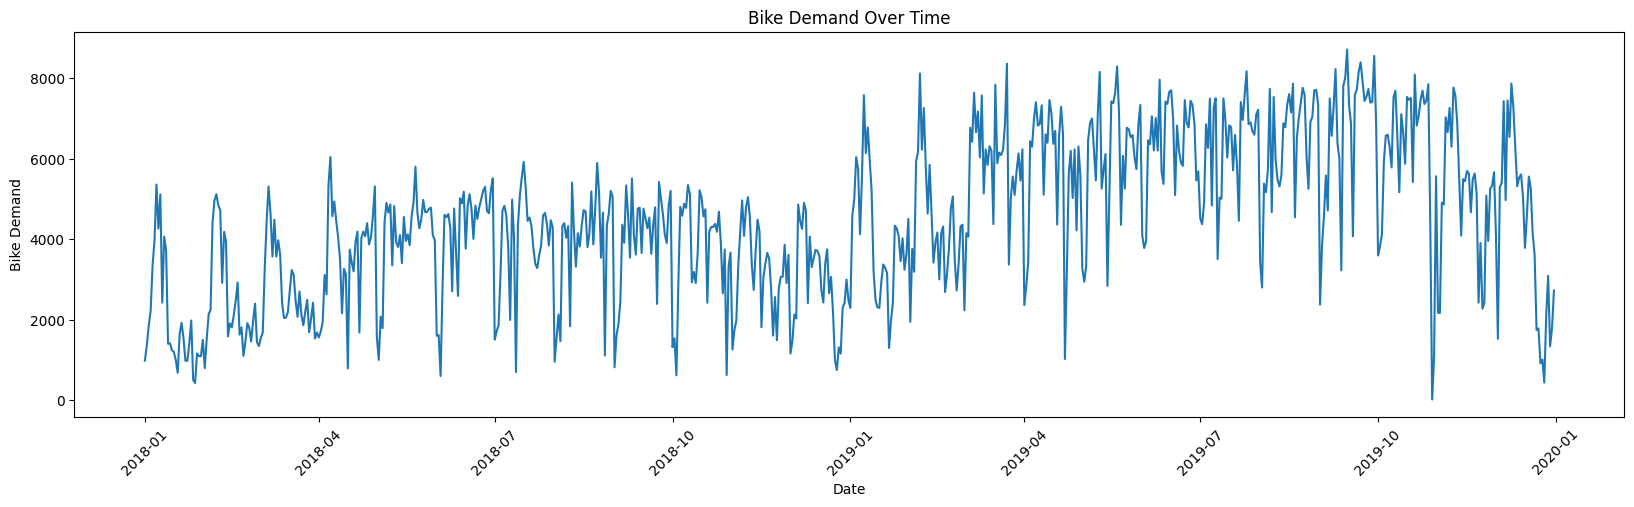

In [62]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=data, x='dteday', y='cnt')
plt.title("Bike Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Bike Demand")
plt.xticks(rotation=45)
plt.show()

# Yes bike demand is increasing overtime

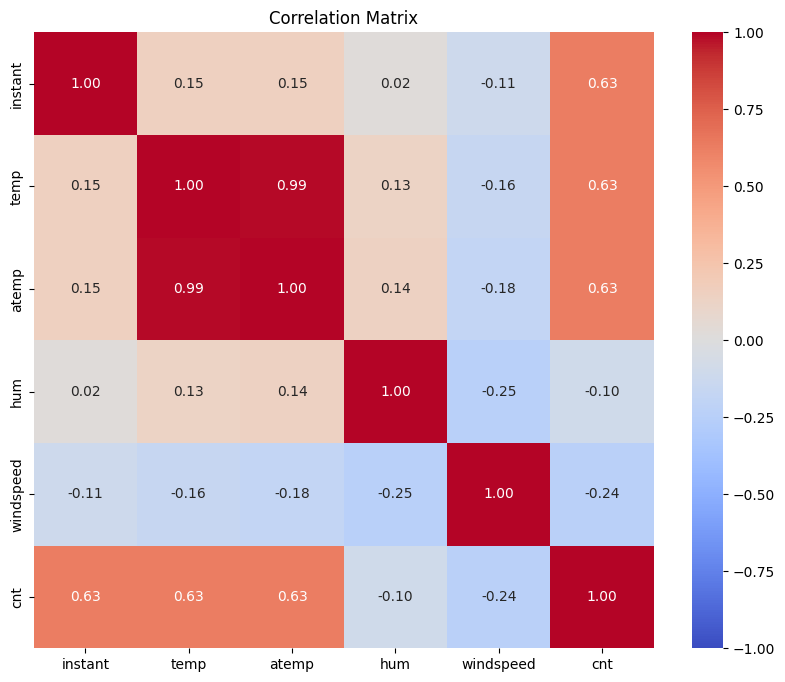

In [48]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [50]:
# Observations
# temp and atemp are highly correlated, we can remove one
# instant, temp and atemp are highly correlated with cnt
# Rest are weekly correlated

In [54]:
# Encoding

label_encoder = LabelEncoder()
data['yr'] = label_encoder.fit_transform(data['yr'])
data['holiday'] = label_encoder.fit_transform(data['holiday'])
data['workingday'] = label_encoder.fit_transform(data['workingday'])

data = pd.get_dummies(data, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

In [55]:
data.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_Mist
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,...,False,False,False,True,False,False,False,False,False,True
1,2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,False,False,False,False,True,False,False,False,False,True
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,...,False,False,True,False,False,False,False,False,False,False
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,...,False,False,False,False,False,False,True,False,False,False
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,...,False,False,False,False,False,False,False,True,False,False


In [63]:
# Scaling
scaler = MinMaxScaler()

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('cnt')

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])



In [65]:
data.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_Mist
0,0.000000,2018-01-01,0.0,0.0,0.0,0.355170,0.373517,0.828620,0.284606,985,...,False,False,False,True,False,False,False,False,False,True
1,0.001372,2018-02-01,0.0,0.0,0.0,0.379232,0.360541,0.715771,0.466215,801,...,False,False,False,False,True,False,False,False,False,True
2,0.002743,2018-03-01,0.0,0.0,1.0,0.171000,0.144830,0.449638,0.465740,1349,...,False,False,True,False,False,False,False,False,False,False
3,0.004115,2018-04-01,0.0,0.0,1.0,0.175530,0.174649,0.607131,0.284297,1562,...,False,False,False,False,False,False,True,False,False,False
4,0.005487,2018-05-01,0.0,0.0,1.0,0.209120,0.197158,0.449313,0.339143,1600,...,False,False,False,False,False,False,False,True,False,False


In [77]:

X = data.drop(columns=['cnt', 'dteday', 'instant'])
y = data['cnt']

model = LinearRegression()

# Selection top 10 features
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]


cols = selected_features.tolist()
selected_features.tolist()

['yr',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'season_spring',
 'mnth_5',
 'mnth_9',
 'mnth_10',
 'weathersit_Light Rain']

In [83]:
data_final = data[cols]
data_final['cnt'] = data['cnt'].copy()
data_final.head()

<ipython-input-83-ca8adbb18f30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['cnt'] = data['cnt'].copy()


,yr,temp,atemp,hum,windspeed,season_spring,mnth_5,mnth_9,mnth_10,weathersit_Light Rain,cnt
0,0.0,0.355170,0.373517,0.828620,0.284606,True,False,False,False,False,985
1,0.0,0.379232,0.360541,0.715771,0.466215,True,False,False,False,False,801
2,0.0,0.171000,0.144830,0.449638,0.465740,True,False,False,False,False,1349
3,0.0,0.175530,0.174649,0.607131,0.284297,True,False,False,False,False,1562
4,0.0,0.209120,0.197158,0.449313,0.339143,True,False,False,False,False,1600


In [84]:
# Train test split

X = data_final.drop(columns=['cnt'])
y = data_final['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((511, 10), (219, 10), (511,), (219,))

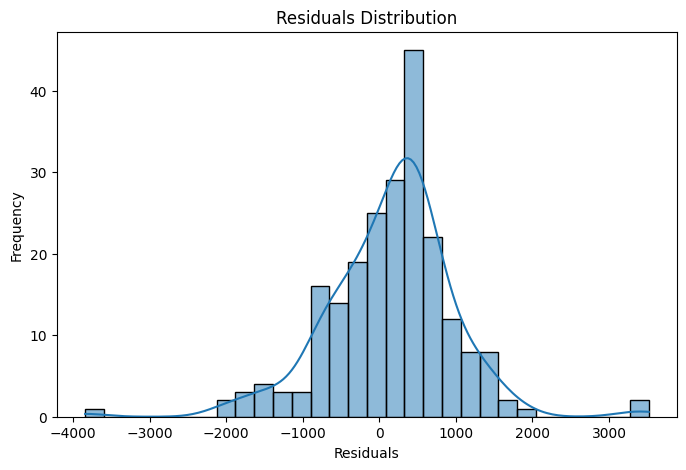

(0.8090347018681778, 0.7998536779195325)

In [91]:
# Linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Residual analysis
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

r2, adj_r2